In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('chennai_house_price_prediction.csv')
df.head()

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,144400,7600000
1,P09411,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,304049,21717770
2,P01812,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,92114,13159200
3,P05346,Velachery,1855,14,3.0,2.0,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,77042,9630290
4,P06210,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,74063,7406250


In [3]:
df.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
count,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7.109000e+03
mean,1382.073006,99.603179,1.637029,1.213260,3.688704,3.517471,3.507244,3.485300,3.503254,141005.726544,1.089491e+07
std,457.410902,57.403110,0.802902,0.409639,1.019099,0.891972,0.897834,0.887266,0.527223,78768.093718,3.768603e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,5055.000000,2.156875e+06
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,84219.000000,8.272100e+06
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,127628.000000,1.033505e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,184506.000000,1.299390e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,495405.000000,2.366734e+07


In [4]:
df.describe(include='all')

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
count,7109,7109,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109,7109,7109,7109,7109,7109,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7.109000e+03
unique,7109,17,NaN,NaN,NaN,NaN,NaN,9,3,5,5,5,6,NaN,NaN,NaN,NaN,NaN,NaN
top,P03869,Chrompet,NaN,NaN,NaN,NaN,NaN,AdjLand,Yes,House,AllPub,Paved,RL,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1681,NaN,NaN,NaN,NaN,NaN,1433,3587,2444,1886,2560,1858,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,1382.073006,99.603179,1.637029,1.213260,3.688704,NaN,NaN,NaN,NaN,NaN,NaN,3.517471,3.507244,3.485300,3.503254,141005.726544,1.089491e+07
std,NaN,NaN,457.410902,57.403110,0.802902,0.409639,1.019099,NaN,NaN,NaN,NaN,NaN,NaN,0.891972,0.897834,0.887266,0.527223,78768.093718,3.768603e+06
min,NaN,NaN,500.000000,0.000000,1.000000,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,2.000000,2.000000,2.000000,5055.000000,2.156875e+06
25%,NaN,NaN,993.000000,50.000000,1.000000,1.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.700000,2.700000,2.700000,3.130000,84219.000000,8.272100e+06
50%,NaN,NaN,1373.000000,99.000000,1.000000,1.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,3.500000,3.500000,3.500000,3.500000,127628.000000,1.033505e+07
75%,NaN,NaN,1744.000000,148.000000,2.000000,1.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,4.300000,4.300000,4.300000,3.890000,184506.000000,1.299390e+07


In [5]:
df.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
COMMIS            0
SALES_PRICE       0
dtype: int64

In [6]:
df.dtypes

PRT_ID            object
AREA              object
INT_SQFT           int64
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
COMMIS             int64
SALES_PRICE        int64
dtype: object

In [7]:
temp = pd.DataFrame(index=df.columns)

In [8]:
temp['Null Values'] = df.isnull().sum()
temp['Data_types'] = df.dtypes
temp['unique_counts'] = df.nunique()

In [9]:
temp

,Null Values,Data_types,unique_counts
PRT_ID,0,object,7109
AREA,0,object,17
INT_SQFT,0,int64,1699
DIST_MAINROAD,0,int64,201
N_BEDROOM,1,float64,4
N_BATHROOM,5,float64,2
N_ROOM,0,int64,5
SALE_COND,0,object,9
PARK_FACIL,0,object,3
BUILDTYPE,0,object,5


Text(0.5, 0, 'Sales')

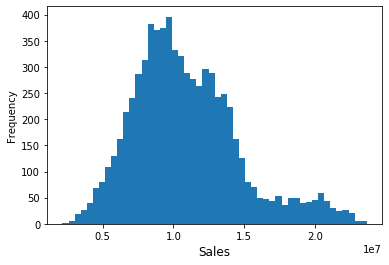

In [10]:
df['SALES_PRICE'].plot.hist(bins=50)
plt.xlabel('Sales',fontsize=12)

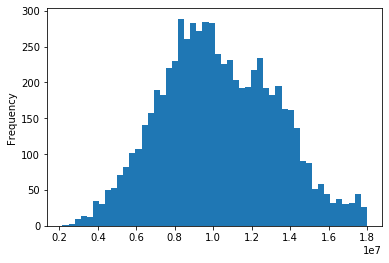

In [11]:
df['SALES_PRICE'].loc[df['SALES_PRICE']<18000000].plot.hist(bins=50)

Text(0.5, 0, 'Area in sq.feet')

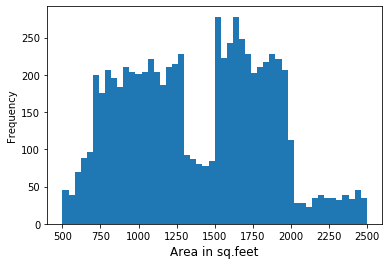

In [12]:
df['INT_SQFT'].plot.hist(bins=50)
plt.xlabel('Area in sq.feet',fontsize=12)

In [13]:
df['N_BEDROOM'].value_counts()

1.0    3795
2.0    2352
3.0     707
4.0     254
Name: N_BEDROOM, dtype: int64

In [14]:
df['N_BEDROOM'].value_counts()/len(df)*100

1.0    53.383036
2.0    33.084822
3.0     9.945140
4.0     3.572936
Name: N_BEDROOM, dtype: float64

In [15]:
df['N_BATHROOM'].value_counts()/len(df)

1.0    0.786187
2.0    0.213110
Name: N_BATHROOM, dtype: float64

In [16]:
df['N_ROOM'].value_counts()/len(df)

4    0.360529
3    0.298917
5    0.175271
2    0.129554
6    0.035729
Name: N_ROOM, dtype: float64

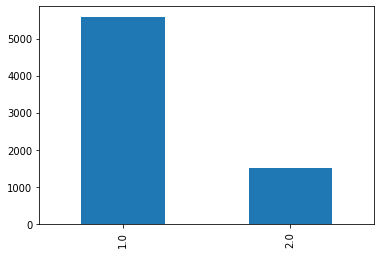

In [17]:
df['N_BATHROOM'].value_counts().plot(kind='bar')

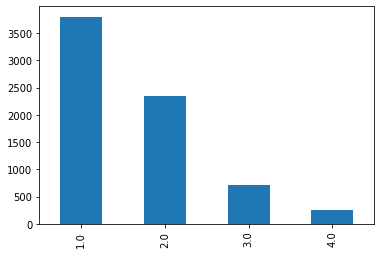

In [18]:
df['N_BEDROOM'].value_counts().plot(kind='bar')

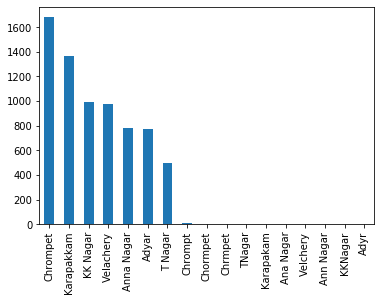

In [19]:
df['AREA'].value_counts().plot.bar()

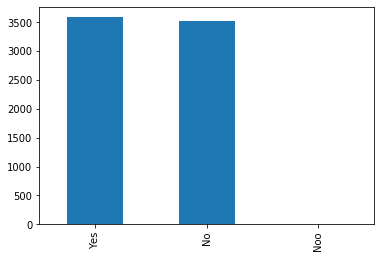

In [20]:
df['PARK_FACIL'].value_counts().plot.bar()

In [21]:
df['PARK_FACIL'].value_counts()

Yes    3587
No     3520
Noo       2
Name: PARK_FACIL, dtype: int64

In [22]:
df.drop_duplicates()

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,144400,7600000
1,P09411,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,304049,21717770
2,P01812,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,92114,13159200
3,P05346,Velachery,1855,14,3.0,2.0,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,77042,9630290
4,P06210,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,74063,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,P03834,Karapakkam,598,51,1.0,1.0,2,AdjLand,No,Others,ELO,No Access,RM,3.0,2.2,2.4,2.520,107060,5353000
7105,P10000,Velachery,1897,52,3.0,2.0,5,Family,Yes,Others,NoSeWa,No Access,RH,3.6,4.5,3.3,3.920,205551,10818480
7106,P09594,Velachery,1614,152,2.0,1.0,4,Normal Sale,No,House,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,167028,8351410
7107,P06508,Karapakkam,787,40,1.0,1.0,2,Partial,Yes,Commercial,ELO,Paved,RL,4.6,3.8,4.1,4.160,119098,8507000


In [23]:
df.shape

(7109, 19)

In [24]:
df.drop_duplicates(['AREA']).shape

(17, 19)

In [25]:
df.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
COMMIS            0
SALES_PRICE       0
dtype: int64

In [26]:
df.dropna(axis=0,how='any').head()

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,144400,7600000
1,P09411,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,304049,21717770
2,P01812,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,92114,13159200
3,P05346,Velachery,1855,14,3.0,2.0,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,77042,9630290
4,P06210,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,74063,7406250


In [27]:
df.dropna(axis=1,how='any').head()

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,131,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,144400,7600000
1,P09411,Anna Nagar,1986,26,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,304049,21717770
2,P01812,Adyar,909,70,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,92114,13159200
3,P05346,Velachery,1855,14,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,77042,9630290
4,P06210,Karapakkam,1226,84,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,74063,7406250


In [28]:
df['N_BATHROOM'].mode()

0    1.0
dtype: float64

In [29]:
df.fillna(df['N_BATHROOM'].mode()[0],inplace=True)

In [30]:
df.dropna(axis=1,how='any').shape

(7109, 19)

In [31]:
df.loc[df['N_BATHROOM'].isnull()==True].head()

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE


In [32]:
for i in range(0,len(df)):
    if pd.isnull(df['N_BATHROOM'][i])==True:
        if df['N_BEDROOM'][i]==1.0:
            df['N_BATHROOM'][i]=1.0
        else:
            df['N_BATHROOM'][i]=2.0

In [33]:
df[[ 'QS_ROOMS','QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL']].head()

,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL
0,4.0,3.9,4.9,4.330
1,4.9,4.2,2.5,3.765
2,4.1,3.8,2.2,3.090
3,4.7,3.9,3.6,4.010
4,3.0,2.5,4.1,3.290


In [34]:
temp = (df['QS_ROOMS'] + df['QS_BATHROOM'] + df['QS_BEDROOM'])/3
pd.concat([df['QS_ROOMS'], df['QS_BATHROOM'], df['QS_BEDROOM'], temp], axis=1).head(10)

,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,0
0,4.0,3.9,4.9,4.266667
1,4.9,4.2,2.5,3.866667
2,4.1,3.8,2.2,3.366667
3,4.7,3.9,3.6,4.066667
4,3.0,2.5,4.1,3.200000
5,4.5,2.6,3.1,3.400000
6,3.6,2.1,2.5,2.733333
7,2.4,4.5,2.1,3.000000
8,2.9,3.7,4.0,3.533333
9,3.1,3.1,3.3,3.166667


In [35]:
df.loc[df['QS_OVERALL'].isnull()==True].shape

(0, 19)

In [36]:
df['QS_OVERALL'].isnull().sum()

0

In [37]:
def fiil_na(x):
    return (x['QS_ROOMS'] + x['QS_BATHROOM'] + x['QS_BEDROOM'])/3

df['QS_OVERALL'] = df.apply(lambda x : fill_na(x) if pd.isnull(x['QS_OVERALL']) else x['QS_OVERALL'], axis = 1)

In [38]:
df.isnull().sum()

PRT_ID           0
AREA             0
INT_SQFT         0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
COMMIS           0
SALES_PRICE      0
dtype: int64

In [39]:
df.dtypes

PRT_ID            object
AREA              object
INT_SQFT           int64
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
COMMIS             int64
SALES_PRICE        int64
dtype: object

In [40]:
# data type of n_bedroom, n_room, n_bathroom

df = df.astype({'N_BEDROOM': 'object', 'N_ROOM': 'object', 'N_BATHROOM': 'object'})

In [41]:
temp = ['AREA','N_BEDROOM','N_BATHROOM','N_ROOM','SALE_COND','PARK_FACIL','BUILDTYPE','UTILITY_AVAIL','STREET','MZZONE']
for i in temp:
    print('********* value count in',i,'************')
    print(df[i].value_counts())
    print('')

********* value count in AREA ************
Chrompet      1681
Karapakkam    1363
KK Nagar       996
Velachery      979
Anna Nagar     783
Adyar          773
T Nagar        496
Chrompt          9
Chormpet         6
Chrmpet          6
TNagar           5
Karapakam        3
Ana Nagar        3
Velchery         2
Ann Nagar        2
KKNagar          1
Adyr             1
Name: AREA, dtype: int64

********* value count in N_BEDROOM ************
1.0    3796
2.0    2352
3.0     707
4.0     254
Name: N_BEDROOM, dtype: int64

********* value count in N_BATHROOM ************
1.0    5594
2.0    1515
Name: N_BATHROOM, dtype: int64

********* value count in N_ROOM ************
4    2563
3    2125
5    1246
2     921
6     254
Name: N_ROOM, dtype: int64

********* value count in SALE_COND ************
AdjLand        1433
Partial        1429
Normal Sale    1423
AbNormal       1406
Family         1403
Adj Land          6
Ab Normal         5
Partiall          3
PartiaLl          1
Name: SALE_COND, dtype: i

In [42]:
df['AREA'].replace({
    'Chrompt':'Chrompet',
    'Chormpet':'Chrompet',
    'Chrmpet':'Chrompet', 
    'TNagar':'T Nagar',
    'Karapakam':'Karapakkam',
    'Ana Nagar':'Anna Nagar',
    'Velchery':'Velachery',
    'Ann Nagar':'Anna Nagar',
    'Adyr':'Adyar',
    'KKNagar':'KK Nagar'
    },inplace=True)

In [43]:
df['PARK_FACIL'].replace({'Noo':'No'},inplace=True)

In [44]:
df['SALE_COND'].replace({'PartiaLl':'Partial', 'Partiall': 'Partial', 
                         'Adj Land': 'AdjLand',  
                         'Ab Normal': 'AbNormal'}, inplace = True)
df['SALE_COND'].value_counts()

AdjLand        1439
Partial        1433
Normal Sale    1423
AbNormal       1411
Family         1403
Name: SALE_COND, dtype: int64

In [45]:
df['BUILDTYPE'].replace({'Comercial':'Commercial', 'Other': 'Others'},inplace = True)
df['UTILITY_AVAIL'].replace({'All Pub':'AllPub'},inplace = True)
df['STREET'].replace({'NoAccess':'No Access', 'Pavd':'Paved'},inplace = True)


In [46]:
temp = ['AREA','N_BEDROOM','N_BATHROOM','N_ROOM','SALE_COND','PARK_FACIL','BUILDTYPE','UTILITY_AVAIL','STREET','MZZONE']
for i in temp:
    print('************ Value Count in', i, '************')
    print(df[i].value_counts())
    print('')

************ Value Count in AREA ************
Chrompet      1702
Karapakkam    1366
KK Nagar       997
Velachery      981
Anna Nagar     788
Adyar          774
T Nagar        501
Name: AREA, dtype: int64

************ Value Count in N_BEDROOM ************
1.0    3796
2.0    2352
3.0     707
4.0     254
Name: N_BEDROOM, dtype: int64

************ Value Count in N_BATHROOM ************
1.0    5594
2.0    1515
Name: N_BATHROOM, dtype: int64

************ Value Count in N_ROOM ************
4    2563
3    2125
5    1246
2     921
6     254
Name: N_ROOM, dtype: int64

************ Value Count in SALE_COND ************
AdjLand        1439
Partial        1433
Normal Sale    1423
AbNormal       1411
Family         1403
Name: SALE_COND, dtype: int64

************ Value Count in PARK_FACIL ************
Yes    3587
No     3522
Name: PARK_FACIL, dtype: int64

************ Value Count in BUILDTYPE ************
House         2444
Others        2336
Commercial    2329
Name: BUILDTYPE, dtype: int64

**

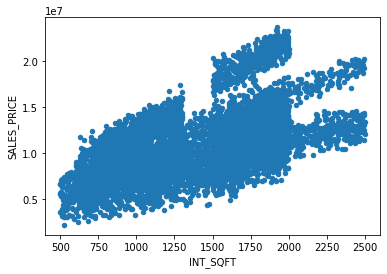

In [47]:
#Bivariant Analysis
df.plot.scatter('INT_SQFT','SALES_PRICE')

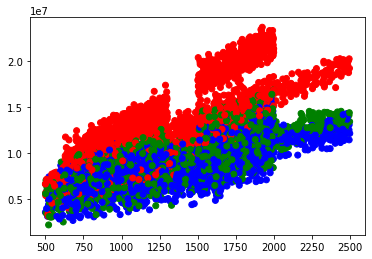

In [48]:
fig, ax = plt.subplots()
colors = {'Commercial':'red','House':'blue','Others':'green'}
ax.scatter(df['INT_SQFT'],df['SALES_PRICE'],c=df['BUILDTYPE'].apply(lambda x: colors[x]))

In [49]:
df.pivot_table(values='SALES_PRICE',index='N_BEDROOM',columns='N_BATHROOM',aggfunc='median')

N_BATHROOM,1.0,2.0
N_BEDROOM,,
1.0,9168740.0,NaN
2.0,12131870.0,9117500.0
3.0,NaN,11663490.0
4.0,NaN,13172000.0


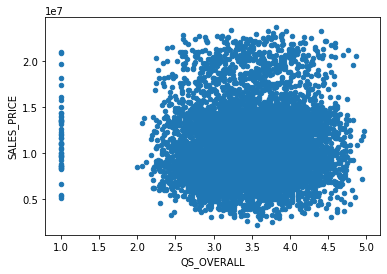

In [50]:
df.plot.scatter('QS_OVERALL','SALES_PRICE')

Text(0.5, 1.0, 'QS_OVERALL')

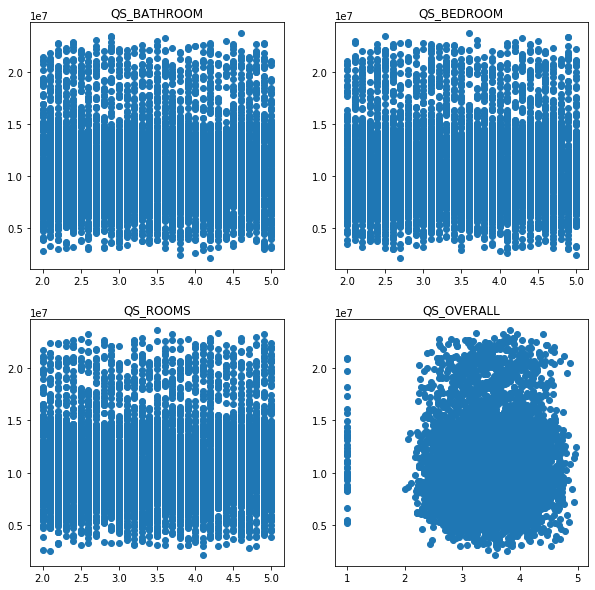

In [51]:
fig , axes = plt.subplots(2,2)

fig.set_figheight(10)
fig.set_figwidth(10)

axes[0,0].scatter(df['QS_BATHROOM'],df['SALES_PRICE'])
axes[0,0].set_title('QS_BATHROOM')

axes[0,1].scatter(df['QS_BEDROOM'],df['SALES_PRICE'])
axes[0,1].set_title('QS_BEDROOM')

axes[1,0].scatter(df['QS_ROOMS'],df['SALES_PRICE'])
axes[1,0].set_title('QS_ROOMS')

axes[1,1].scatter(df['QS_OVERALL'],df['SALES_PRICE'])
axes[1,1].set_title('QS_OVERALL')

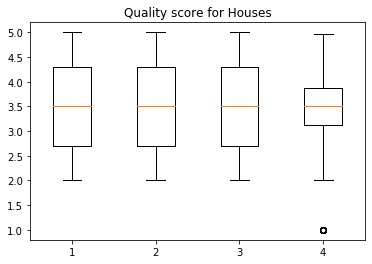

In [52]:
ax = plt.figure().add_subplot(111)
ax.set_title('Quality score for Houses')

bp = ax.boxplot([df['QS_BATHROOM'],df['QS_BEDROOM'],df['QS_ROOMS'],df['QS_OVERALL']])

In [53]:
df.groupby('BUILDTYPE').SALES_PRICE.median()

BUILDTYPE
Commercial    13356200
House          8985370
Others         9637260
Name: SALES_PRICE, dtype: int64

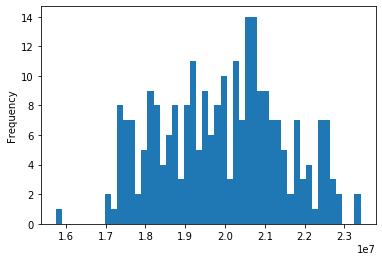

In [54]:
temp_df = df.loc[(df['BUILDTYPE']=='Commercial')&(df['AREA']=='Anna Nagar')]
temp_df['SALES_PRICE'].plot.hist(bins=50)

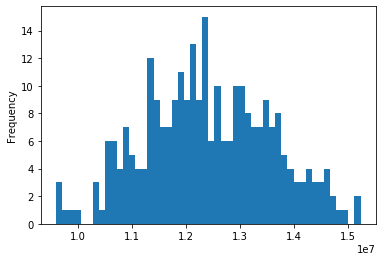

In [55]:
temp_df = df.loc[(df['BUILDTYPE']=='House')&(df['AREA']=='Anna Nagar')]
temp_df['SALES_PRICE'].plot.hist(bins=50)

In [56]:
df.groupby(['BUILDTYPE', 'PARK_FACIL']).SALES_PRICE.median()

BUILDTYPE   PARK_FACIL
Commercial  No            12692985
            Yes           13920600
House       No             8514140
            Yes            9468150
Others      No             9104645
            Yes           10039405
Name: SALES_PRICE, dtype: int64

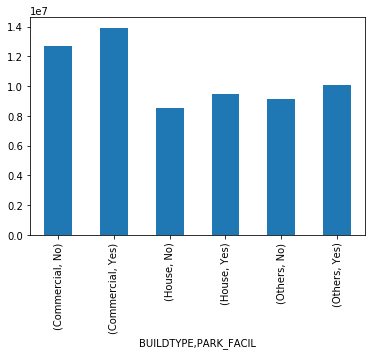

In [57]:
temp = df.groupby(['BUILDTYPE', 'PARK_FACIL']).SALES_PRICE.median()
temp.plot.bar(stacked=True)

In [58]:
df.pivot_table(values='SALES_PRICE',index='AREA',aggfunc='median')

,SALES_PRICE
AREA,
Adyar,8878350
Anna Nagar,13727895
Chrompet,9606725
KK Nagar,12146740
Karapakkam,7043125
T Nagar,14049650
Velachery,10494410


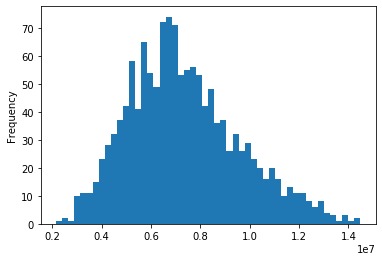

In [59]:
temp_df = df.loc[(df['AREA']=='Karapakkam')]
temp_df['SALES_PRICE'].plot.hist(bins=50)

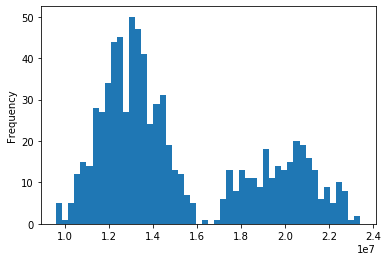

In [60]:
temp_df = df.loc[(df['AREA']=='Anna Nagar')]
temp_df['SALES_PRICE'].plot.hist(bins=50)

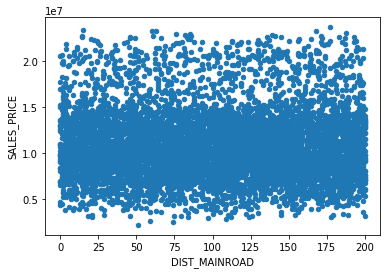

In [61]:
df.plot.scatter('DIST_MAINROAD','SALES_PRICE')

In [62]:
df.groupby(['STREET']).SALES_PRICE.median()

STREET
Gravel       10847225
No Access     9406050
Paved        10470070
Name: SALES_PRICE, dtype: int64

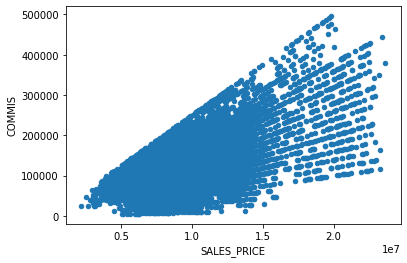

In [63]:
df.plot.scatter('SALES_PRICE','COMMIS')

In [64]:
df[['SALES_PRICE','COMMIS']].corr()

,SALES_PRICE,COMMIS
SALES_PRICE,1.000000,0.626275
COMMIS,0.626275,1.000000


In [65]:
# Train Test Split
df.drop(['PRT_ID'], axis=1, inplace = True)


In [71]:
df = pd.get_dummies(df)

In [72]:
x = df.drop(['SALES_PRICE'],axis=1)
y = df['SALES_PRICE']
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val = train_test_split(x,y,test_size=0.3,random_state=101)

In [73]:
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((4976, 48), (2133, 48), (4976,), (2133,))

In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error

In [75]:
lreg = LinearRegression()
lreg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [76]:
pred_train = lreg.predict(x_train)
train_score = np.sqrt(mean_squared_log_error(y_train,pred_train))

In [78]:
pred_test = lreg.predict(x_val)
test_score = np.sqrt(mean_squared_log_error(y_val,pred_test))

In [80]:
print('Train score: ',train_score)
print('Test score:',test_score)

Train score:  0.08784496348260638
Test score: 0.09022049219362234
